In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Algerian_forest_fires_new_dataset.csv')

In [3]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [4]:
#Independent Features
X=df.drop('FWI',axis=1)

#Dependent/Output Feature
y=df['FWI']

In [5]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [6]:
#Splitting Data into Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=40)

In [7]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [8]:
X_train.shape

(182, 11)

In [9]:
y_train.shape

(182,)

In [10]:
X_test.shape

(61, 11)

In [11]:
#Correlation between Independent Features
X.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.586639,0.089408
Classes,0.516015,-0.432161,-0.069964,-0.379097,0.769492,0.585658,0.511123,0.735197,0.586639,1.000000,0.162347


In [12]:
#Check for Multicollinearity
corr=X.corr()

In [13]:
#Correlation function to find features from dataset with a threshold 
def correlationfeatures(dataset,threshold):
    corr_features=set()
    features_corr=dataset.corr()
    for i in range(len(features_corr.columns)):
        for j in range(i):
            if abs(features_corr.iloc[i,j])>threshold:
                colname=features_corr.columns[i]
                corr_features.add(colname)
                
    return corr_features  

In [14]:
#threshold for 0.85
corr_features_threshold=correlationfeatures(X_train,0.85)

In [15]:
corr_features_threshold

{'BUI', 'DC'}

In [16]:
#Drop the features that have thresold >0.85
X_train.drop(corr_features_threshold,axis=1,inplace=True)

In [17]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
149,37,37,13,0.0,92.5,27.2,11.7,1,1
137,29,87,15,0.4,47.4,4.2,0.2,0,1
173,31,71,17,0.0,87.3,46.6,6.9,1,1
231,29,41,8,0.1,83.9,24.9,2.7,1,1
28,32,47,13,0.3,79.9,18.4,2.2,0,0
...,...,...,...,...,...,...,...,...,...
184,39,33,17,0.0,93.7,17.1,17.2,1,1
165,34,45,17,0.0,90.5,18.0,10.9,1,1
7,30,73,15,0.0,86.6,12.1,5.6,1,0
219,31,62,15,0.0,83.3,5.8,3.8,1,1


In [18]:
#Drop the features that have threshold >0.85 from test data
X_test.drop(corr_features_threshold,axis=1,inplace=True)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

Linear Regression

mean absolute error is 0.5340854472870479
r2score is 0.9879326823687385


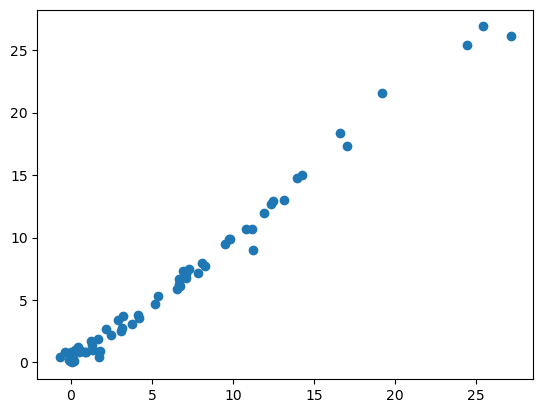

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linregressor=LinearRegression()
linregressor.fit(X_train_scaled,y_train)
y_pred=linregressor.predict(X_test_scaled)
mae=mean_absolute_error(y_pred,y_test)
r2score=r2_score(y_pred,y_test)
print('mean absolute error is',mae)
print('r2score is',r2score)
plt.scatter(y_pred,y_test)

Lasso Regression

Mean abosulte error of Lass 1.1980295954841222
r2score 0.9238662197095908


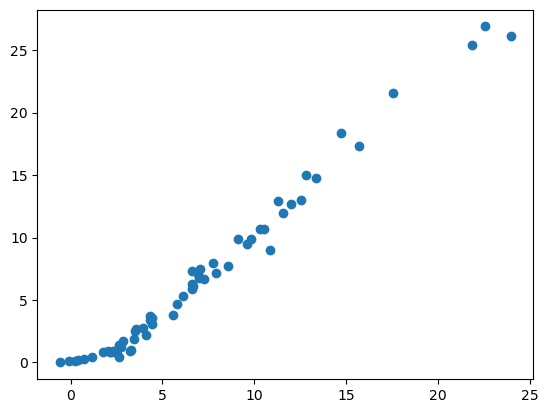

In [21]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lassoreg=Lasso()
lassoreg.fit(X_train_scaled,y_train)
y_pred=lassoreg.predict(X_test_scaled)
meanlasso=mean_absolute_error(y_pred,y_test)
r2scorelasso=r2_score(y_pred,y_test)
print('Mean abosulte error of Lass',meanlasso)
print('r2score',r2scorelasso)
plt.scatter(y_pred,y_test)


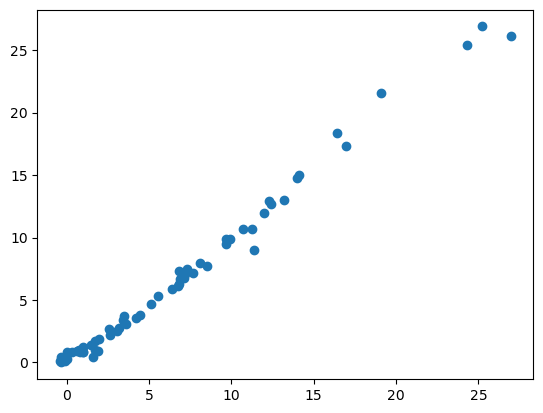

In [22]:
#Cross Validation
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_pred,y_test)

In [23]:
maelassocv=mean_absolute_error(y_pred,y_test)
r2scorelassocv=r2_score(y_pred,y_test)
print('maelassocv',maelassocv)
print('r2scorelasso',r2scorelassocv)

maelassocv 0.5129869391931782
r2scorelasso 0.9874686633058654


In [24]:
lassocv.alpha_


0.04004678624961337

In [25]:
lassocv.alphas_

array([6.99828963, 6.52662833, 6.08675543, 5.67652848, 5.29394946,
       4.93715499, 4.60440726, 4.29408562, 4.00467862, 3.73477669,
       3.48306524, 3.2483183 , 3.02939252, 2.8252216 , 2.63481112,
       2.45723367, 2.29162434, 2.13717653, 1.99313799, 1.85880716,
       1.73352978, 1.61669567, 1.50773579, 1.40611945, 1.3113517 ,
       1.22297099, 1.14054684, 1.0636778 , 0.99198947, 0.9251327 ,
       0.86278186, 0.80463325, 0.75040366, 0.69982896, 0.65266283,
       0.60867554, 0.56765285, 0.52939495, 0.4937155 , 0.46044073,
       0.42940856, 0.40046786, 0.37347767, 0.34830652, 0.32483183,
       0.30293925, 0.28252216, 0.26348111, 0.24572337, 0.22916243,
       0.21371765, 0.1993138 , 0.18588072, 0.17335298, 0.16166957,
       0.15077358, 0.14061194, 0.13113517, 0.1222971 , 0.11405468,
       0.10636778, 0.09919895, 0.09251327, 0.08627819, 0.08046332,
       0.07504037, 0.0699829 , 0.06526628, 0.06086755, 0.05676528,
       0.05293949, 0.04937155, 0.04604407, 0.04294086, 0.04004

Ridge Regression

ridge mae 0.5458273128650651
ridger2score 0.9874104700179545


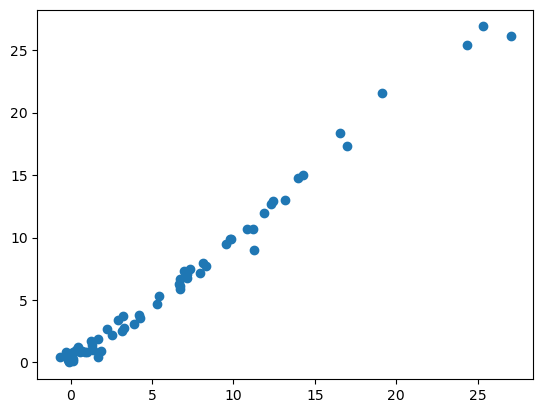

In [26]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
plt.scatter(y_pred,y_test)
maeridge=mean_absolute_error(y_pred,y_test)
ridger2score=r2_score(y_pred,y_test)
print('ridge mae',maeridge)
print('ridger2score',ridger2score)

In [27]:
#Ridge Cross validation
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
maeridgecv=mean_absolute_error(y_pred,y_test)
r2scoridcv=r2_score(y_pred,y_test)
print('maeridgecv',maeridgecv)
print('r2scoridcv',r2scoridcv)

maeridgecv 0.5458273128650651
r2scoridcv 0.9874104700179545


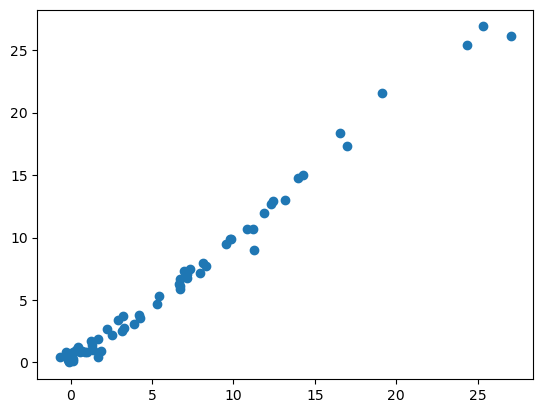

In [28]:
plt.scatter(y_pred,y_test)

In [29]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

MAE 1.895814026453772
r2score 0.760217039189246


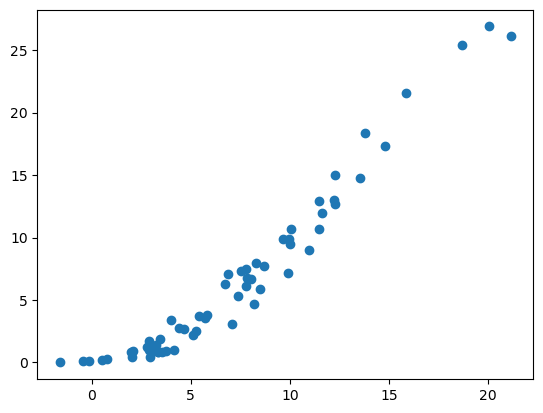

In [30]:
#Elastic Net Regression
from sklearn.linear_model import ElasticNet
elasticnet=ElasticNet()
elasticnet.fit(X_train_scaled,y_train)
y_pred=elasticnet.predict(X_test_scaled)
meaelasticnet=mean_absolute_error(y_pred,y_test)
r2elastic=r2_score(y_pred,y_test)
print('MAE',meaelasticnet)
print('r2score',r2elastic)
plt.scatter(y_pred,y_test)
                      

In [31]:
#Pickling the models and Preprocessing 
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))